# Who is the Better Driver: Lewis Hamilton vs Fernando Alonso

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Who-is-the-Better-Driver:-Lewis-Hamilton-vs-Fernando-Alonso" data-toc-modified-id="Who-is-the-Better-Driver:-Lewis-Hamilton-vs-Fernando-Alonso-1">Who is the Better Driver: Lewis Hamilton vs Fernando Alonso</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#1.-Background" data-toc-modified-id="1.-Background-1.0.1">1. Background</a></span></li><li><span><a href="#2.-Project-Overview" data-toc-modified-id="2.-Project-Overview-1.0.2">2. Project Overview</a></span></li><li><span><a href="#3.-Data-Cleaning" data-toc-modified-id="3.-Data-Cleaning-1.0.3">3. Data Cleaning</a></span></li><li><span><a href="#4.-Preparation-for-Analysis" data-toc-modified-id="4.-Preparation-for-Analysis-1.0.4">4. Preparation for Analysis</a></span></li><li><span><a href="#5.-Exploration-of-Age-in-Formula-1" data-toc-modified-id="5.-Exploration-of-Age-in-Formula-1-1.0.5">5. Exploration of Age in Formula 1</a></span></li><li><span><a href="#6.-Grid-Positioning" data-toc-modified-id="6.-Grid-Positioning-1.0.6">6. Grid Positioning</a></span></li><li><span><a href="#7.-Lap-by-Lap-Consistency-In-Race" data-toc-modified-id="7.-Lap-by-Lap-Consistency-In-Race-1.0.7">7. Lap by Lap Consistency In Race</a></span></li><li><span><a href="#8.-Measure-of-Driver-Performance-Capabilities---Lap-Times" data-toc-modified-id="8.-Measure-of-Driver-Performance-Capabilities---Lap-Times-1.0.8">8. Measure of Driver Performance Capabilities - Lap Times</a></span></li><li><span><a href="#9a.-End-of-Race---Wins" data-toc-modified-id="9a.-End-of-Race---Wins-1.0.9">9a. End of Race - Wins</a></span></li><li><span><a href="#9b.-End-of-Race---Points-Earned" data-toc-modified-id="9b.-End-of-Race---Points-Earned-1.0.10">9b. End of Race - Points Earned</a></span></li><li><span><a href="#10.-Putting-it-All-Together" data-toc-modified-id="10.-Putting-it-All-Together-1.0.11">10. Putting it All Together</a></span></li><li><span><a href="#11.-References" data-toc-modified-id="11.-References-1.0.12">11. References</a></span></li></ul></li></ul></li></ul></div>

### 1. Background

Formula 1 (aka F1) is an international racing series that currently involves ten different teams, each with two drivers. The number of teams has varied across the years since Formula 1 started in 1950. Some of the teams, formally called “constructors”, are familiar to the general population through their production of commercial cars. These include Ferrari, Mercedes, McLaren, and Renault. Each race is known as a Grand Prix and the location of these races have changed (and will continue to change) over time. Currently, in 2020, there are 10 teams in Formula 1 who participate 17 races.

Determining the winner of the annual series works through a point system. The current system awards points to the top 10 drivers; the closer you finish to first, the more points you receive. The driver with the most points at the end of the season is the world champion. 

The structure of a F1 weekend is as follows. First is Friday practice where drivers have two 90-minute opportunities (once in the morning and once in the afternoon) to familiarize themself with the track. On Saturday morning, the third and final practice session takes place for an hour and this is followed by qualifying in the afternoon. This afternoon session lasts about an hour and is split into 3 sessions: Q1, Q2, Q3. In the first qualifying session (Q1), all 20 drivers race on the track at the same time and the five slowest drivers are eliminated. They fill positions 16-20 in the actual race, corresponding to when they finished in this qualifying round. In Q2, the remaining 15 cars all race simultaneously and the slowest 5 cars are once again eliminated. These 5 drivers take positions 15-11, with their positions analogous to how they finsihed in Q2. Finally, in Q3, the remaining 10 drivers compete for pole (first) position and the fastest driver takes this position. They will start in first place on the grid when the race starts the following day. Sunday is the day of the actual race where all drivers compete for podiums (top 3 placement). You can read more about the Grand Prix format here.

For the sake of this project, we'll be focusing on the main race on Sunday.

### 2. Project Overview

I obtained this data from Kaggle, which can be found [here](https://www.kaggle.com/rohanrao/formula-1-world-championship-1950-2020)

In this project, I use different metrics to compare the two McLaren drivers in the 2007 season: Fernando Alonso (from Spain) and Lewis Hamilton (from the UK). Alonso has been around in F1 since 2001 and has is a 2x world champion, known to derive a lot of power from poorly-engineered cars. Conversely, this is Hamilton's first season in Formula 1; he was previously racing in GP2 (a former F1 feeder).

The metrics we'll be using to evaluate each driver will be their ability to:
   - Begin towards the front of the pack (good grid/starting positioning)
   - Maintaining/Improving their positioning in each lap of a given race
   - Drive quickly by studying lap times
   - Win races
   - Win points
    
Clearly, wins and points will be more heavily weighted since these directly dictate a driver's standing in a season. However, grid positioning and speed heavily influence these two factors and can help undercover any nuances between drivers who have similar number of wins/points.

### 3. Data Cleaning

Data Cleaning mostly consisted of flagging outliers, setting place holders for missing values, checking consistency between related variables, and renaming columns. After the files were cleaned, I used SQL to join relevant fields from different tables and then made some final changes prior to this analysis.

### 4. Preparation for Analysis

In [44]:
# import libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# load up datasets
re = pd.read_pickle('final_data/agg_results')
ham_2007 = pd.read_pickle('final_data/ham_results')
ham_2007_lap = pd.read_pickle('final_data/lap_times')
lap_all = pd.read_pickle('final_data/lap_times_all')
ham_quali_2007 = pd.read_pickle('final_data/qualifying')

In [3]:
#make sure race happened after drivers bday
re['age_chk'] = np.where(re['race_date'] > re['dob'], 'Good', 'Bad')
re.age_chk.value_counts()

Good    19929
Bad         1
Name: age_chk, dtype: int64

In [4]:
# person just has one record (missing bday) - drop
re = re[re['age_chk'] == 'Good']
re.drop('age_chk', axis=1, inplace=True)

# calculate age 
re['age'] = ((re['race_date'] - re['dob']).dt.days)//365
re.age.describe()

count    19929.000000
mean        29.231923
std          4.814243
min         17.000000
25%         26.000000
50%         29.000000
75%         32.000000
max         55.000000
Name: age, dtype: float64

### 5. Exploration of Age in Formula 1

Hamilton (22 years old in 2007) is younger and therefore less experienced driver than Alonso (26 years in 2007), so we would probably expect Alonso to perform better. Let's look at the relationship between age and performance to be sure.

In [5]:
# distribution of ages 
fig = px.histogram(re, x='age', marginal='box', labels={'age': 'Driver Age'}, 
                   title='Distribution of Driver Age Throughout F1 History')
fig.show()

The majority of Formula 1 drivers are in their mid to late twenties with the rest mostly in their early to mid thirties.

In [6]:
# aggregate number of wins/races broken down by age 
df_age = re[['race','dname', 'position', 'points', 'age']].copy()
df_age.sort_values(by=['dname', 'race'], ascending=False, inplace=True)
df_age.loc[:, 'num_races'] = pd.Series(1, index=df_age.index)
df_age['wins'] = (df_age['position'] == 1).astype('int64')

# do one by driver
df_age_agg = df_age.groupby(['age', 'dname'], as_index=False)[['wins','num_races']].sum()
df_age_agg.sort_values(by=['dname', 'age'], ascending=False, inplace=True)

In [7]:
# plot wins,race, wins per race against age of driver
df_age_wins_agg2 =  df_age_agg.groupby(['age'], as_index=False)[['wins','num_races']].sum()
df_age_wins_agg2['wins_p_race'] = df_age_wins_agg2['wins']/df_age_wins_agg2['num_races']

# get rid of outliers
df_age_wins_agg2 = df_age_wins_agg2.loc[df_age_wins_agg2.age <= 46, :]

# make separate colors to indicate Hamilton/Alonso age
df_age_wins_agg2['driver'] = np.where(df_age_wins_agg2.age == 22, 'Hamilton', 
         (np.where(df_age_wins_agg2.age == 26, 'Alonso', 'Other Drivers')))

In [8]:
# plot number of races, wins, and wins per race by age - Lewis is 22/Alonso 27 at 2007 year of analysis
fig = px.bar(df_age_wins_agg2, x='age', y='wins', color='driver',
              color_discrete_map={'Other Drivers': 'rgb(228, 26, 28)', 'Hamilton': '#2E91E5', 'Alonso': '#1C8356'},
              labels={'wins': 'Number of Wins', 'age': 'Driver Age'},
             title='Number of Wins Broken Down By Age of Driver (1950-2017)')

fig.add_annotation(x=21.7, y=11, text='Hamilton (22)', showarrow=True, arrowhead=2, arrowsize=1, arrowwidth=2)
fig.add_annotation(x=25.7, y=71, text='Alonso (26)', showarrow=True, arrowhead=2, arrowsize=1, arrowwidth=2)
fig.show()

In [9]:
# number of races
fig = px.bar(df_age_wins_agg2, x='age', y='num_races', color='driver',
              color_discrete_map={'Other Drivers': 'rgb(228, 26, 28)', 'Hamilton': '#2E91E5', 'Alonso': '#1C8356'},
              labels={'num_races': 'Number of Races', 'age': 'Driver Age'},
             title='Number of Races Broken Down By Age of Driver (1950-2017)')

fig.add_annotation(x=21.3, y=636, text='Hamilton (22)', showarrow=True, arrowhead=2, arrowsize=1, arrowwidth=2)
fig.add_annotation(x=25.7, y=1500, text='Alonso (26)', showarrow=True, arrowhead=2, arrowsize=1, arrowwidth=2)
fig.show()

In [10]:
# number of wins per race
fig = px.bar(df_age_wins_agg2, x='age', y='wins_p_race', color='driver',
              color_discrete_map={'Other Drivers': 'rgb(228, 26, 28)', 'Hamilton': '#2E91E5', 'Alonso': '#1C8356'},
              labels={'wins_p_race': 'Number of Wins Per Race', 'age': 'Driver Age'},
             title='Number of Wins Per Race Broken Down By Age of Driver (1950-2017)')

fig.add_annotation(x=21.7, y=.0145, text='Hamilton (22)', showarrow=True, arrowhead=2, arrowsize=1, arrowwidth=2)
fig.add_annotation(x=25.7, y=.048, text='Alonso (26)', showarrow=True, arrowhead=2, arrowsize=1, arrowwidth=2)
fig.show()

The most successful drivers are between their late twenties and early-thirties. However, we can also see that's the age of most drivers in Formula 1 so this means that more wins will occur in this age group. 

Therefore, it's important to standardize the data, which is the reason for the third graph, wins per grand prix. Here, we see a semi-steady increase as driver age increases. This means that as drivers get older and build more experience, they tend to perform better, up to a certain point of course.

We do note a jump in wins per race as people approach mid-forties but this is mostly due to the lack of drivers participating in races at this age rather than a sudden increase in skill.

Regardless, the trend confirms our initial hypothesis that Alonso is likely to perform better because he's older than Hamilton. However, this also affirms that Hamilton has more potential; by the time he's Alonso's age, he could be performing at a higher level than Alonso was at 26.

### 6. Grid Positioning

Right before the actual race begins, all the drivers position themselves along the track. Aforementioned, the order of this positioning is determined by each drivers' performance in qualifying. We deem that one driver outperforms another in any given race if their grid positioning is better/ahead of their teammates. 

In [11]:
# explore relationship between qualifying/grid positioning and wins/podiums/positions on aggregate level
re_pos = re[['race', 'dname', 'position', 'grid']].copy()
re_pos['win'] = (re_pos.position == 1).astype('int64')
re_win_agg = re_pos.groupby(['grid'], as_index=False)['win'].sum()
re_win_agg = re_win_agg.loc[re_win_agg['grid'] > 0 ,]

fig = px.line(re_win_agg, x='grid', y='win', range_x=[0, 33], labels={'win': 'Number of Wins', 'grid': 'Grid Position'},
             title='Relationship of Starting Position and Wins')
fig.show()

In the graph above, we can see that final results are heavily influenced by grid (initial) positioning. The closer to first one starts, the more likely they'll finish towards first as well. 

In [12]:
ham_2007_piv = ham_2007.copy()
ham_2007_piv['race_date'] = ham_2007_piv['race_date'].astype('str')
ham_2007_piv['race'] = ham_2007_piv['race_date'] + '_' + ham_2007_piv['race']
ham_2007_piv = ham_2007_piv.pivot(index='race', columns='dname', values=['grid', 'position', 'points', 'fastestLapSpeed',
                                                                'fastestLapTime']).reset_index()

# make pivoted version for easier analysis
ham_2007_piv['race'] = ham_2007_piv['race'].str.split('_', n=1, expand=False)
ham_2007_piv['race_date'] = pd.to_datetime(ham_2007_piv['race'].str[0])
ham_2007_piv['race_'] = ham_2007_piv['race'].str[1]
ham_2007_piv = ham_2007_piv[['race_date', 'race_', 'grid', 'position', 'points', 'fastestLapSpeed', 'fastestLapTime']]
ham_2007_piv.rename(columns={'race_':'race'}, inplace=True)
ham_2007_piv.sort_values(by=['race_date', 'race'], inplace=True)

In [13]:
ham_2007_piv_pos = ham_2007_piv[['race_date', 'race', 'position', 'grid']].copy()
ham_2007_piv_pos['grid'] = ham_2007_piv_pos['grid'].astype('float')
ham_2007_piv_pos['position'] = ham_2007_piv_pos['position'].astype('float')

# number of positions behind first place
ham_2007_piv_pos['alon_grid_from1'] = ham_2007_piv_pos['grid']['Fernando Alonso'] - 1
ham_2007_piv_pos['ham_grid_from1'] = ham_2007_piv_pos['grid']['Lewis Hamilton'] - 1

In [14]:
fig = go.Figure()

fig.add_trace(go.Bar(x=ham_2007_piv_pos.race, y=ham_2007_piv_pos.alon_grid_from1,
                    name='Alonso', marker_color='#1C8356'))

fig.add_trace(go.Bar(x=ham_2007_piv_pos.race, y=ham_2007_piv_pos.ham_grid_from1,
                    name='Hamilton', marker_color='#2E91E5'))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  yaxis=dict(title='Number of Positions'),
                  xaxis=dict(title='Race'),
                  title='Number of Positions Each Driver Began Behind 1st Place')
fig['layout']['yaxis']['autorange'] = "reversed"
fig.show()

The shorter the bar, the closer each driver started towards first place. With the exception of the 2007 French Grand Prix and the 2007 Hungarian Grand Prix, Alonso always began in the top 3. Similarly, besides the 2007 European Grand Prix, Hamilton always started in the top 3 before each race. This sets each driver up to finish in a podium position, which will maximize points earned throughout the season.

In [15]:
# plot number of times Hamilton began ahead of alonso and vice-versa
grid_comp = ham_2007[['race', 'dname', 'grid']].copy()
grid_comp['grid_dif_ham'] = grid_comp.groupby('race')['grid'].diff()
grid_comp['grid_dif_alon'] = grid_comp.groupby('race')['grid'].diff(-1)
grid_comp['ham_ahead'] = (grid_comp.grid_dif_ham < 0).astype('int64')
grid_comp['alon_ahead'] = (grid_comp.grid_dif_alon < 0).astype('int64')

# aggregate number of times started ahead of teammate
grid_comp = grid_comp.groupby(['dname'])[['ham_ahead', 'alon_ahead']].sum()
grid_comp.reset_index(inplace=True)

# consolidate into one column since only one of the two drivers are going to be ahead at a time
grid_comp['ahead'] = grid_comp['ham_ahead'] + grid_comp['alon_ahead']
grid_comp = grid_comp[['dname', 'ahead']]
grid_comp['pct_ahead'] = grid_comp['ahead']/17

In [16]:
fig = go.Figure(data=[go.Pie(labels=grid_comp.dname, values=grid_comp.pct_ahead, textinfo='label+percent',
                            insidetextorientation='radial', hole=.3)])

colors=['#1C8356', '#2E91E5']
fig.update_traces(marker=dict(colors=colors))
fig.update_layout(title_text='Percentage of Races Where Driver Began Ahead of Teammate')

fig.show()

Hamilton started closer towards first place in 10 of the 17 races in the 2007 season. This shows that Hamilton was more skilled in qualifying and classifies him as the better driver in this first metric. Given the trend we saw before, we would therefore expect Hamilton to have better finishing positions and subsequently gain more points.

In [17]:
# box plot of grid positioning
ham_2007_pos = ham_2007[['race_date', 'race', 'dname', 'grid', 'position']].copy()
ham_2007_pos['grid'] = ham_2007_pos['grid'].astype('int64')
ham_2007_pos['position'] = ham_2007_pos['position'].astype('int64')

fig = px.box(ham_2007_pos, y='dname', x='grid', color='dname',
            color_discrete_map={'Fernando Alonso': '#1C8356', 'Lewis Hamilton': '#2E91E5'},
            labels={'dname': 'Driver', 'grid': 'Grid Position'}, title='Distribution of Grid Positioning')
fig.show()

In [18]:
ham_2007_piv_pos.grid.describe()

dname,Fernando Alonso,Lewis Hamilton
count,17.000000,17.000000
mean,3.176471,2.588235
std,2.186187,2.237712
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,2.000000
75%,4.000000,4.000000
max,10.000000,10.000000


We can finally look at the distribution of grid positioning as a measure of consistency. Consistency is significant because 
this shows that a driver is talented and able to repeat their great performance often.

We can see on average Hamilton began closer towards the beginning of the grid - confirming our aforementioned findings. 

Alonso, however, was slightly more consistent in his grid positioning since the standard deviation for Alonso's grid positioning was marginally smaller than that of Hamilton. This means that he tended to start in the same position more often while Hamilton's starting position fluctuated a bit more. Yet, this difference was quite marginal and given the previous analyses, Hamilton is still the better driver in terms of grid positioning.

### 7. Lap by Lap Consistency In Race

Speaking of consistency, this next stage of the analysis looks at how consistent these two drivers are during their races. Do they tend to waver in their positioning? Do they remain in one position the whole time? As we touched upon before, a better driver will produce consistent results.

In [19]:
fig = px.violin(ham_2007_lap, y='position', x='dname', box=True, points='all', color='dname',
                color_discrete_map={'Fernando Alonso': '#1C8356', 'Lewis Hamilton': '#2E91E5'},
                labels={'dname': 'Driver', 'position':'Position'},
                title='Distribution of Positions in Each Lap Raced in 2007 Season')
fig.show()

Looking at the box plots above, Hamilton had some laps where he was farther behind in the pack than his teammate. As a result, Alonso was more consistent with his lap positioning. However when looking at the center of the data, Hamilton tended to remain in 2nd place throughout the 2007 season. This is farther ahead than Alonso who usually was in 3rd place in each lap.

These two findings favor each driver. However, the median positioning is a more accurate indicator of each driver's abilities since it's a more robust measurement. So far, Hamilton is outperforming his older, more experienced teammate Alonso.

In [20]:
# look at difference in SD - smaller one means more consistent
ham_lap_stddev = ham_2007_lap.groupby(['race_date', 'race', 'dname'])['position'].std()
ham_lap_stddev = ham_lap_stddev.unstack()
ham_lap_stddev.reset_index(inplace=True)
ham_lap_stddev['dif'] = ham_lap_stddev['Lewis Hamilton'] - ham_lap_stddev['Fernando Alonso']

fig = go.Figure(data=go.Scatter(x=ham_lap_stddev.race, y=ham_lap_stddev.dif, mode='markers',
                                marker_symbol='star-square-dot'))
fig.update_traces(marker=dict(size=12, color='SkyBlue',
                              line=dict(width=2,
                                        color='MediumPurple')),
                  selector=dict(mode='markers'))
fig.update_layout(title='Comparison of Consistency Maintained Throughout Races', xaxis=dict(title='Race'),
                  yaxis=dict(title='Difference in Standard Deviation (Hamilton - Alonso)'))
fig.add_shape(type='line', x0=-1, y0=0, x1=17, y1=0, line=dict(color='Black', dash='dot'),)
fig.show()

Here, we're looking at the standard deviation of McLaren driver's positioning throughout each race. The smaller the standard deviation, the less their position varied. Since both Hamilton and Alonso (nearly) always begin toward the front of the pack, they only have a few positions to gain while simultaneously having many positions to lose. Therefore, any improvement will marginally impact the standard deviation while loss in position will likely have a large impact.



Looking at the standard deviation visualization, we can see that Hamilton has more consistent lap positions in 9 out of 17 races, which is signified by the markers below the dotted line. Meanwhile, Alonso had a smaller standard deviation in 7 out of 17 races. 

Let's give some context behind the variation in the data:
   - 2007 Canadian Grand Prix: Alonso ran across the grass multiple times, costing him placement.
   - 2007 European Grand Prix: Hamilton punctured his tire caused by a BMW collision and subsequently spun out.
   - 2007 Hungarian Grand Prix: Hamilton was in first in every lap, maximizing the difference in deviation with  Alonso.
   - 2007 Japanese Grand Prix: Alonso crashed, blaming it on the rain earlier in the day.
   - 2007 Brazilian Grand Prix: Hamilton faced gearbox issues and was issued a risky tire strategy.
    

Two of the three races where Alonso had the most extreme variation in lap positioning were due to his actual driving. Meanwhile, Hamilton ran into issues outside of his control. This paints Hamilton as the more proficient driver. As a result, Hamilton outperforms Alonso again and so far is the more talented driver.

### 8. Measure of Driver Performance Capabilities - Lap Times

This next section explores how much performance each driver can extract from the car. The two vehicles are identical from an engineering standpoint and any differences in speed come from the skill of the driver itself. This is a great way to get an idea of which driver can push the car to its maximum capabilities. Here, we'll explore each driver's lap times. Clearly, shorter lap times indicate more innate skill in the driver.

In [21]:
# calculate average and median lap times by driver and race
ham_2007_lap_agg = ham_2007_lap[['race', 'dname', 'seconds']].copy()

# need to convert time stamp of lap times into durations
ham_2007_lap_agg = ham_2007_lap_agg.groupby(['race', 'dname'], as_index=False).agg(['mean', 'median'])

ham_2007_allap = ham_2007_lap_agg.unstack()
ham_2007_allap.columns = ham_2007_allap.columns.droplevel()
ham_2007_allap.reset_index(inplace=True)

In [22]:
# difference in average lap times
ham_2007_allap['dif_avg'] = ham_2007_allap['mean']['Lewis Hamilton'] - ham_2007_allap['mean']['Fernando Alonso']

fig = px.bar(ham_2007_allap, x='race', y='dif_avg',
              labels={'race': 'Race', 'dif_avg': 'Difference In Lap Time (In Seconds)'},
             color='dif_avg',
             title='Average Lap Times Comparison for 2007 Season')

yvals = np.arange(-4, 4, .5)

fig.update_layout(
    yaxis = dict(
        tickmode='linear',
        tickvals=yvals,
        dtick=0.5))
fig.show()

Alonso, on average, was quicker than Hamilton in the McLaren in 10 out of 17 races of the 2007 season. However, most of the differences are within half a second. The larger disparities result from the races where a driver has some sort of issues, as mentioned earlier. 

Let's take a look at median lap times, which helps account for any outliers that are present.

In [23]:
# difference in median lap times 
ham_2007_allap['dif_med'] = ham_2007_allap['median']['Lewis Hamilton'] - ham_2007_allap['median']['Fernando Alonso']

fig = px.bar(ham_2007_allap, x='race', y='dif_med',
              labels={'race': 'Race', 'dif_med': 'Difference In Lap Time (In Seconds)'},
             color='dif_med',
             title='Median Lap Times Comparison for 2007 Season')

yvals = np.arange(-4, 4, .5)

fig.update_layout(
    yaxis = dict(
        tickmode='linear',
        tickvals=yvals,
        dtick=0.5))
fig.show()

Both Hamilton and Alonso had equivalent median lap times for the first race of the season. Beyond that, Hamilton had a quicker lap times in 9 out of 16 races. For the most part, when Hamilton was faster than Alonso, he was significantly faster. In contrast, Alonso rarely dusted his teammate when he is the quicker driver.

We now have conflicting information and need to decide whether median or mean is the better descriptive statistic to use. The median is a better metric with the presence of outliers and fewer data points. As a result, we'll now explore any unusually long lap times.

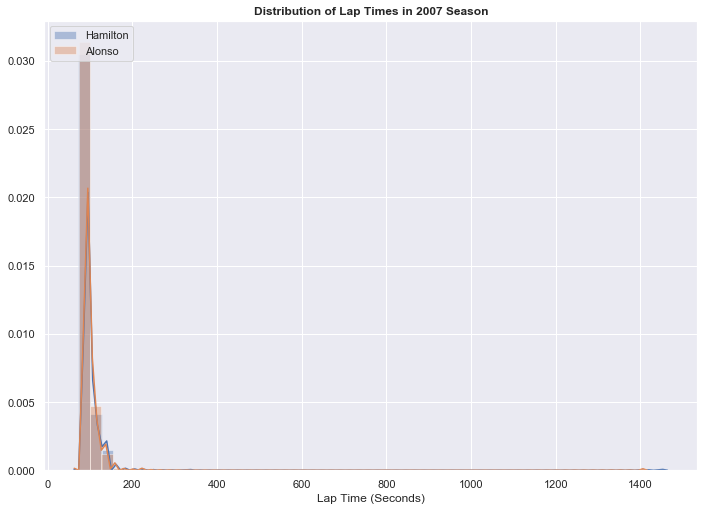

In [24]:
# plot distribution of lap times to see if have a lot of outliers and whether mean/median would be better statistic
ham_lap_vals = ham_2007_lap.loc[ham_2007_lap['dname'] == 'Lewis Hamilton', 'seconds'].values
alon_lap_vals = ham_2007_lap.loc[ham_2007_lap['dname'] == 'Fernando Alonso', 'seconds'].values


sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(ham_lap_vals, norm_hist=True, axlabel='Lap Time (Seconds)', label='Hamilton')
sns.distplot(alon_lap_vals, norm_hist=True, axlabel='Lap Time (Seconds)', label='Alonso')

plt.title('Distribution of Lap Times in 2007 Season', weight='bold')
plt.legend(loc='upper left')
plt.show()


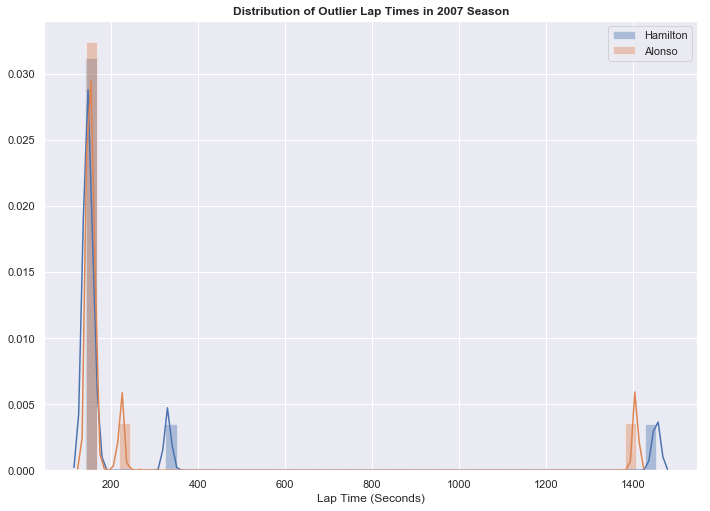

In [25]:
# do distribution of outliers
ham_lap_vals_out = np.array(ham_lap_vals)
alon_lap_vals_out = np.array(alon_lap_vals)

# write quick function to keep extreme values
def keep_high(arr, k):
    return arr[np.where(arr >=k)]

ham_lap_vals_out_ = keep_high(ham_lap_vals_out, np.percentile(ham_lap_vals_out, 99))
alon_lap_vals_out_ = keep_high(alon_lap_vals_out, np.percentile(alon_lap_vals_out, 99))

sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(ham_lap_vals_out_, norm_hist=True, axlabel='Lap Time (Seconds)', label='Hamilton')
sns.distplot(alon_lap_vals_out_, norm_hist=True, axlabel='Lap Time (Seconds)', label='Alonso')

plt.title('Distribution of Outlier Lap Times in 2007 Season', weight='bold')
plt.legend(loc='upper right')
plt.show()

In [26]:
drivers = ['Lewis Hamilton', 'Fernando Alonso']

for d in drivers:
    print('Lap time statistics for ' + d)
    print(ham_2007_lap.loc[ham_2007_lap['dname'] == d, 'seconds'].describe())
    print('\n')

Lap time statistics for Lewis Hamilton
count    1037.000000
mean       90.600860
std        45.564947
min        72.506000
25%        77.363000
50%        83.893000
75%        95.044000
max      1453.884000
Name: seconds, dtype: float64


Lap time statistics for Fernando Alonso
count    1039.000000
mean       90.481900
std        43.616718
min        73.150000
25%        77.940000
50%        83.956000
75%        95.592500
max      1406.432000
Name: seconds, dtype: float64




There are some outliers in our lap time data, which are better seen in the second graph. There are multiple lap times that enter the hundreds and even a few in the thousands. This could come from a multitude of sources: tire wear, adverse weather, or perhaps a safety car was deployed due to an accident that forces everyone to slow down. 

Furthermore, there is a relatively small number of observations so outliers will skew the mean more than if we had more robust data. Therefore, it makes more sense to use the median as the performance metric, awarding Hamilton with more dominance and innate speed in terms of lap times. This is a significant conclusion since it shows that Hamilton, in this season, displayed more natural skill.

### 9a. End of Race - Wins

As we discussed earlier, wins is one of the easiest ways to decide which driver performs better in a season.

Hamilton came in first in:
 - United States Grand Prix
 - Canadian Grand Prix
 - Hungarian Grand Prix
 - Japanese Grand Prix

Alonso came in first in:
 - European Prix
 - Italian Grand Prix
 - Monaco Grand Prix
 - Malaysian Grand Prix
 
Surprisingly, both McLaren drivers ended up with the same number of wins at the end of the season.

We can take a closer look at the positions Hamilton and Alonso finished in order to distinguish the two drivers.

In [29]:
# number of positions each driver finished behind first
ham_2007_pos_piv = ham_2007_piv[['race', 'position']].copy()
ham_2007_pos_piv['position'] = ham_2007_pos_piv['position'].astype('int64')
ham_2007_pos_piv['ham_fin1'] = ham_2007_pos_piv['position']['Lewis Hamilton'] - 1
ham_2007_pos_piv['alon_fin1'] = ham_2007_pos_piv['position']['Fernando Alonso'] - 1

fig = go.Figure()

fig.add_trace(go.Bar(x=ham_2007_pos_piv.race, y=ham_2007_pos_piv.alon_fin1,
                    name='Alonso', marker_color='#1C8356'))

fig.add_trace(go.Bar(x=ham_2007_pos_piv.race, y=ham_2007_pos_piv.ham_fin1,
                    name='Hamilton', marker_color='#2E91E5'))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  yaxis=dict(title='Number of Positions'),
                  xaxis=dict(title='Race'),
                  title='Number of Positions Each Driver Finished Behind 1st Place')

fig.update_layout(
    yaxis = dict(
        tickmode = 'linear',
        tick0 = 0,
        dtick = 2
    )
)

fig['layout']['yaxis']['autorange'] = "reversed"

fig.show()

From the graph above, we can see that Hamilton finished on a podium position in 12 of the 17 races in the 2007 season. This can be observed by the blue bar having a height less than or equal to two. He finished in 1st place 4 times, 2nd place 5 times, and 3rd place 3 times. 

Alonso also had 12 races where he finished in the top 3. He finished in first 4 times, second 4 times, and third 4 times. 

While these two produce nearly identical statistics, Hamilton slightly edges out Alonso by finishing in second place one more time than his teammate. This difference actually resulted in Hamilton finishing second and Alonso third in the drivers standing for the 2007 season.

In [30]:
# difference in positions
ham_2007_pos_piv['end_dif'] = ham_2007_pos_piv['position']['Fernando Alonso'] - ham_2007_pos_piv['position']['Lewis Hamilton']

fig = px.bar(ham_2007_pos_piv, x='race', y='end_dif',
              labels={'race': 'Race', 'end_dif': 'Difference'},
             color='end_dif',
             title='Number of Positions Hamilton Finished Ahead of Alonso During 2007 Season')
fig.show()

In [31]:
# plot number of times Hamilton finsihed ahead of alonso and vice-versa
end_comp = ham_2007[['race', 'dname', 'position']].copy()
end_comp['end_dif_ham'] = end_comp.groupby('race')['position'].diff()
end_comp['end_dif_alon'] = end_comp.groupby('race')['position'].diff(-1)
end_comp['ham_ahead'] = (end_comp.end_dif_ham < 0).astype('int64')
end_comp['alon_ahead'] = (end_comp.end_dif_alon < 0).astype('int64')

# aggregate number of times started ahead of teammate
end_comp = end_comp.groupby(['dname'])[['ham_ahead', 'alon_ahead']].sum()
end_comp.reset_index(inplace=True)

# consolidate into one column since only one of the two drivers are going to be ahead at a time
end_comp['ahead'] = end_comp['ham_ahead'] + end_comp['alon_ahead']
end_comp = end_comp[['dname', 'ahead']]
end_comp['pct_ahead'] = end_comp['ahead']/17

fig = go.Figure(data=[go.Pie(labels=end_comp.dname, values=end_comp.pct_ahead, textinfo='label+percent',
                            insidetextorientation='radial', hole=.3)])

colors=['#1C8356', '#2E91E5']
fig.update_traces(marker=dict(colors=colors))
fig.update_layout(title_text='Percentage of Races Where Driver Finished Ahead of Teammate')

fig.show()

Above, we can see that Hamilton finished ahead of Alonso in 7 of the 17 races. However, Alonso usually only finished ahead of Hamilton by a few positions. He only held a one position advantage in 60% of the races where he did finish better than his teammate. Conversely, Hamilton tended to put more space between Alonso when he ws the leading McLaren driver. Evidently, we have favorable findings for both drivers.

In [32]:
# box plot for Alonso/Fernando of finishing positions - median seems to equal 75th percentile for hamilton
fig = px.box(ham_2007_pos, y='dname', x='position', color='dname',
            color_discrete_map={'Fernando Alonso': '#1C8356', 'Lewis Hamilton': '#2E91E5'},
            labels={'dname': 'Driver', 'position': 'Grid Position'}, title='Distribution of Finishing Position')
fig.show()

In [33]:
ham_2007_pos_piv.position.describe()

dname,Fernando Alonso,Lewis Hamilton
count,17.000000,17.000000
mean,4.000000,3.941176
std,4.769696,4.464731
min,1.000000,1.000000
25%,2.000000,2.000000
50%,3.000000,2.000000
75%,4.000000,4.000000
max,21.000000,19.000000


On average, Hamilton marginally finished closer to pole position than Alonso. Hamilton's median position was one ahead of Alonso's and he actually fluctuated less in ending positioning too. 

Overall, while Alonso finished farther ahead of his teammate more often, he only does so slightly. However, when it comes to podium placement, the most important component of final position, Hamilton holds the crown. Furthermore, he tended to finish in better positions when looking at descriptive statistics. While the comparison in this metric is much closer than the previous ones, Hamilton portrays himself as the superior driver in terms of final positioning.

### 9b. End of Race - Points Earned

As mentioned earlier, a driver's points determine where they place in the overall standings at the end of a season. While positioning and points are directly linked, we can still explore the subtleties to draw further distinctions between Alonso and Hamilton. 

In [34]:
# interactive graph - number of points
ham_2007_finish['sum_pts'] = ham_2007_finish.groupby(['dname'])['points'].cumsum()
fig = px.bar(ham_2007_finish, x='sum_pts', y='dname', animation_frame='race', color='dname',
            labels={'dname': 'Driver', 'sum_pts': 'Points Earned'},
            color_discrete_map={'Fernando Alonso': '#1C8356', 'Lewis Hamilton': '#2E91E5'})

fig.update_traces(dict(marker_line_width=1, marker_line_color="black"))
fig.update_layout(xaxis=dict(range=[0, 120]))
fig.update_layout(title_text="Points Earned By Each Driver Throughout 2007 Season")

# add buttons
fig.update_layout(
    updatemenus = [
        {
            'buttons': [
                {
                    'args': [None, {'frame': {'duration': 800, 'redraw': False},
                                   'fromcurrent': True, 'transition': {'duration': 800,
                                                                      'easing': 'linear'}}],
                    'label': 'Play',
                    'method': 'animate'
                },
                {
                    'args': [[None], {'frame': {'duration': 0, 'redraw': False},
                                     'mode': 'immediate',
                                     'transition': {'duration':0}}],
                    'label': 'Pause',
                    'method': 'animate'
                }
            ]
            
        }
    ]
)                
                  
fig.show()

At the end of the season, both drivers finished with 109 points. As a result, the two most decisive factors in determining the better driver fail to clearly distinguish which driver outperforms the other.

In [35]:
# explore difference in points per race
ham_2007_pts_piv = ham_2007_piv[['race', 'points']].copy()
ham_2007_pts_piv['points'] = ham_2007_pts_piv['points'].astype('float')
ham_2007_pts_piv['dif'] = ham_2007_pts_piv['points']['Lewis Hamilton'] - ham_2007_pts_piv['points']['Fernando Alonso']

fig = px.bar(ham_2007_pts_piv, x='race', y='dif',
              labels={'race': 'Race', 'dif': 'Difference (Hamilton - Alonso)'},
             color='dif',
             title='Difference in Points During 2007 Season')
fig.show()

Alonso had 10 races where scored more points which directly ties to the 10 races where he finished ahead of Hamilton. Once again we can see that when Alonso scored more points, it was only by a couple points. Meanwhile, Hamilton created more of a gap when he scored more.

In [36]:
# box plot for Alonso/Fernando of points- median seems to equal 75th percentile for hamilton
ham_2007_pts = ham_2007[['race', 'dname', 'points']].copy()
fig = px.box(ham_2007_pts, y='dname', x='points', color='dname',
            color_discrete_map={'Fernando Alonso': '#1C8356', 'Lewis Hamilton': '#2E91E5'},
            labels={'dname': 'Driver', 'points': 'Points'}, title='Distribution of Points')
fig.show()

In [37]:
ham_2007_pts_piv.points.describe()

dname,Fernando Alonso,Lewis Hamilton
count,17.000000,17.000000
mean,6.411765,6.411765
std,3.063063,3.298841
min,0.000000,0.000000
25%,5.000000,5.000000
50%,6.000000,8.000000
75%,8.000000,8.000000
max,10.000000,10.000000


On average, the two McLaren drivers scored the same number of points. Hamilton's median points were higher than Alonso's though he did have marginally more variation too. 

We derive similar insights here as we did in the finishing position comparison since the two go hand in hand. Overall, Hamilton barely beats Alonso in this criterion too.

### 10. Putting it All Together

Putting all the metrics together, we can sum up what we found as the following:


- Grid positioning: __Hamilton__ is the favorite in this category.


- Driving consistency lap-to-lap: __Hamilton__ is more consistent more often.


- Driver Performance (lap times): __Hamilton__ does slightly better than Alonso with more, quicker lap times. Taking into account outliers, Hamilton sets faster median lap times than Alonso.


- Finishing positions: Alonso finishes ahead of Hamilton more often. However, __Hamilton__ is superior where it counts most, podium placement.

- Points: Alonso has more races with more points but __Hamilton__ has more favorable statistics.


- Final Comparison:
    - Lewis Hamilton: ranks higher in __5__ of the metrics we looked at.
    - Fernando Alonso: ranks higher in __0__ of the metrics we looked at.
    
__Overall__ Hamilton was the better driver in the 2007 season although they were very well matched. This is is especially impressive since this was his rookie season while Alonso had a few years of experience under his belt. 

### 11. References

1. https://en.wikipedia.org/wiki/2007_French_Grand_Prix
2. https://en.wikipedia.org/wiki/2007_Hungarian_Grand_Prix
3. https://en.wikipedia.org/wiki/2007_Formula_One_World_Championship
4. https://en.wikipedia.org/wiki/2007_Chinese_Grand_Prix
5. https://en.wikipedia.org/wiki/2007_Canadian_Grand_Prix
6. https://en.wikipedia.org/wiki/2007_European_Grand_Prix
7. https://en.wikipedia.org/wiki/2007_Japanese_Grand_Prix
8. https://en.wikipedia.org/wiki/2007_Brazilian_Grand_Prix